<a href="https://colab.research.google.com/github/jgonza44/2019-CS109A/blob/master/CS_301_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We began with the [Basic Starter Kernel](https://www.kaggle.com/dster/nyc-taxi-fare-starter-kernel-simple-linear-model ) 
All NYC taxi information can be found at: https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page


Project 1 - Taxi Fare Prediction                               
Christopher Im                                               
Juan Gonzalez

### Initial Setup

Things we need to do to start the project since were taking the data from our google drive. To run this code, make sure you have a folder named "data" in your google drive with the file "train.csv" in it.

In [ ]:
# Initial Python environment setup...
import numpy as np 
import pandas as pd
import seaborn as sns 
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline 
import matplotlib.pyplot as plt
import os  
print(os.listdir('/content/drive/My Drive/data')) 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['train.csv', 'test.csv', 'submission.csv']


### Import the data and add features
First let's read in our training data. The entire dataset is too large, so we're using the first 50,000 rows.

In [ ]:
data_df =  pd.read_csv('/content/drive/My Drive/data/train.csv', nrows = 50_000, parse_dates = ['pickup_datetime']).drop(columns = 'key')

Lets take a look at the first 5 rows of the data to see what we are working with, then look at the data that we were given.

In [ ]:
data_df.head(n=10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
5,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1
6,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1
7,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1
8,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1
9,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        50000 non-null  float64            
 1   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   50000 non-null  float64            
 3   pickup_latitude    50000 non-null  float64            
 4   dropoff_longitude  50000 non-null  float64            
 5   dropoff_latitude   50000 non-null  float64            
 6   passenger_count    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 2.7 MB


In [ ]:
data_df.describe()  

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


There's a couple features that might be important for us to have to be able to get a closer look at the data.

Adding a longitude and latitude distance value will give us the manhattan distance from the pickup point and the drop off point.  We think that distance traveled will have a large impact on being able to predict fare prices.

Adding a separate feature for the year, month, and day might also prove to be useful for being able to predict fare prices for our training model.

In [ ]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    df['manhattan'] = df['abs_diff_longitude'] + df['abs_diff_latitude']


add_travel_vector_features(data_df)

In [ ]:
import calendar

data_df ['pickup_datetime']=pd.to_datetime(data_df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
data_df ['pickup_date']= data_df['pickup_datetime'].dt.date
data_df ['pickup_day']=data_df['pickup_datetime'].apply(lambda x:x.day)
data_df ['pickup_hour']=data_df['pickup_datetime'].apply(lambda x:x.hour)
data_df ['pickup_day_of_week']=data_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
data_df ['pickup_month']=data_df['pickup_datetime'].apply(lambda x:x.month)
data_df ['pickup_year']=data_df['pickup_datetime'].apply(lambda x:x.year)

Lets take a look at the first 5 rows with all of our features included along with the data types of each.

In [ ]:
data_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,manhattan,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,0.011742,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,0.107481,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,0.019212,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,0.029386,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,0.027194,2010-03-09,9,7,Tuesday,3,2010


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   fare_amount         50000 non-null  float64            
 1   pickup_datetime     50000 non-null  datetime64[ns, UTC]
 2   pickup_longitude    50000 non-null  float64            
 3   pickup_latitude     50000 non-null  float64            
 4   dropoff_longitude   50000 non-null  float64            
 5   dropoff_latitude    50000 non-null  float64            
 6   passenger_count     50000 non-null  int64              
 7   abs_diff_longitude  50000 non-null  float64            
 8   abs_diff_latitude   50000 non-null  float64            
 9   manhattan           50000 non-null  float64            
 10  pickup_date         50000 non-null  object             
 11  pickup_day          50000 non-null  int64              
 12  pickup_hour         50000 non-nu

### Remove incomplete and outliers in our data.
If there are any NaN's in the data, its incomplete and must be removed.

In [ ]:
print(data_df.isnull().sum())

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
abs_diff_longitude    0
abs_diff_latitude     0
manhattan             0
pickup_date           0
pickup_day            0
pickup_hour           0
pickup_day_of_week    0
pickup_month          0
pickup_year           0
dtype: int64


Lets keep track of the old size of the data, then the new size to keep track of how many we removed.

In [ ]:
print('Old size: %d' % len(data_df))
data_df = data_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(data_df))

Old size: 50000
New size: 50000


Since we only care about the NYC area, an absolute Long or Lat of > 1 will mean they are basically outside the NYC range as 1 Long/Lat is approximately 69 miles. 

I used this website to give me a range of longitude and latitude and came up with a range of [-74.05, -73.71] for longitude, and a range of [40.55, 40.9] for latitude

[Lat/Long on mouse cursor](https://www.findlatitudeandlongitude.com/?lat=41.68142205277912&lon=-82.68436074256897&zoom=13&map_type=G_NORMAL_MAP)

In [ ]:
print('Old size: %d' % len(data_df))
data_df = data_df[(data_df.abs_diff_longitude < 1.0) & (data_df.abs_diff_latitude < 1.0)]
data_df = data_df[(data_df.pickup_latitude >= 40.55) & (data_df.pickup_latitude <= 40.9)]
data_df = data_df[(data_df.pickup_longitude >= -74.05) & (data_df.pickup_longitude <= -73.71)]
data_df = data_df[(data_df.dropoff_latitude >= 40.55) & (data_df.dropoff_latitude <= 40.9)]
data_df = data_df[(data_df.dropoff_longitude >= -74.05) & (data_df.dropoff_longitude <= -73.71)]
print('New size: %d' % len(data_df))

Old size: 50000
New size: 48754


Now that we have removed the invalid and outliers for longitude and latitudes,  
we can import Geopy to calculate a more precise distance between the pickup and dropoff points in miles and add that as a feature

In [ ]:
from geopy.distance import geodesic

def getDistance(df):
  distance = []
  for row in df.itertuples():
    origin = (row.pickup_latitude, row.pickup_longitude)
    end = (row.dropoff_latitude, row.dropoff_longitude)
    distance.append(geodesic(origin, end).miles)
  df['distance'] = distance
  
getDistance(data_df)

In order to charge a fare, there must be at least one person in the taxi.  NYC law also states that you cant have more than 7 people in the cab so data with less than 0 passengers and more than 7 passengers must be removed from the data.

If the manhattan distance or geopy distance is 0, the taxi did not actually move anywhere so the fare would be 0 in that case anyway.  We will remove data where the taxi didn't move anywhere.  I think a case for distance travelled less than .2 miles (~1000 feet) can be removed from the data as well.

In [ ]:
print('Old size: %d' % len(data_df))
data_df = data_df[(data_df.passenger_count > 0) & (data_df.passenger_count <= 7)]
data_df = data_df[(data_df.manhattan > 0) & (data_df.distance > .1)]
print('New size: %d' % len(data_df))

Old size: 48754
New size: 47712


In [ ]:
data_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,manhattan,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,0.011742,2009-06-15,15,17,Monday,6,2009,0.639764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,0.107481,2010-01-05,5,16,Tuesday,1,2010,5.246511
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,0.019212,2011-08-18,18,0,Thursday,8,2011,0.863167
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,0.029386,2012-04-21,21,4,Saturday,4,2012,1.737223
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,0.027194,2010-03-09,9,7,Tuesday,3,2010,1.241710


Some fares are way too high and some are negative. Taking the fares and looking at their percentile to remove outliers seems like the best choice here.

In [ ]:
for col in ['fare_amount']:
     print(f'{col.capitalize():17}: 99.99% = {round(np.percentile(data_df[col], 99.99), 2):5} \t 99.999% = {round(np.percentile(data_df[col], 99.999), 2)}')

Fare_amount      : 99.99% = 85.99 	 99.999% = 137.8


In [ ]:
print('Old size: %d' % len(data_df))
data_df = data_df[(data_df.fare_amount > 0) & (data_df.fare_amount <= (135.26))]
print('New size: %d' % len(data_df))

Old size: 47712
New size: 47707


### Lets Take a look at our data after removing the outliers

Now that the outliers and incomplete data is taken out, we can start plotting them to see if we can find correlations between the features

We should graph pickup/dropoff long and lat on top of a map to see where they are mostly populated.  Not suprisingly, the Manhattan area seems to have a huge amount of dropoffs/pickups.  While dropoffs seem more densly populated outside the Manhattan area.

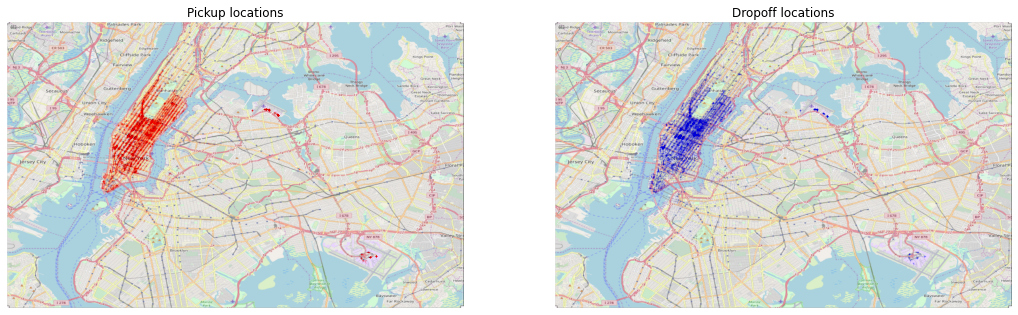

In [ ]:
BB_zoom = (-74.1, -73.7, 40.6, 40.85)
nyc_map_zoom = plt.imread('https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/images/nyc_-74.1_-73.7_40.6_40.85.PNG?raw=true')

def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2, color = False):
    fig, axs = plt.subplots(1, 2, figsize=(18, 22))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].axis('off')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].axis('off')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)
    
plot_on_map(data_df.sample(len(data_df)), BB_zoom, nyc_map_zoom, s=0.05, alpha=0.05)

Taking a look at the plot of Abs longitude vs Abs latitude a majority of the rides seem to be short rides with another cluster for longer rides.

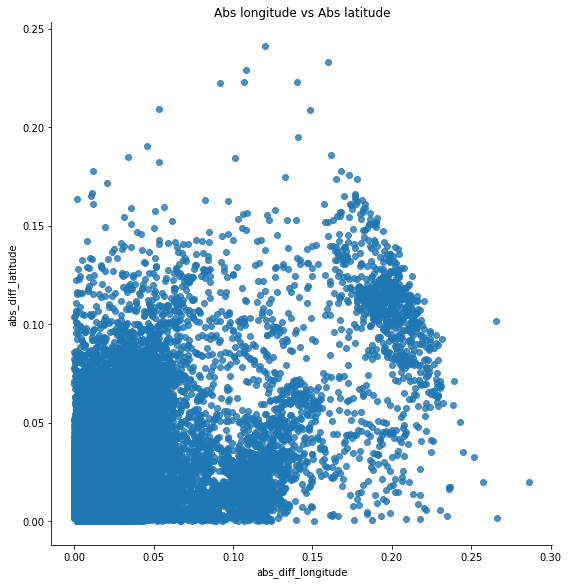

In [ ]:
palette = sns.color_palette('Paired', 10)
sns.lmplot('abs_diff_longitude', 'abs_diff_latitude', height = 8, palette=palette,
           fit_reg = False, data = data_df.sample(len(data_df)));
plt.title('Abs longitude vs Abs latitude');

We can use a bar graph to show the count of # of passengers in the data.  A huge majority of people ride taxi's by themselves.


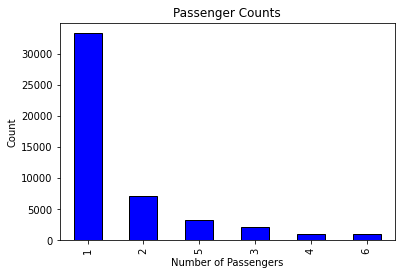

In [ ]:
data_df['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Passenger Counts'); plt.xlabel('Number of Passengers'); plt.ylabel('Count');

The avg fare for each passenger count is basically the same in our data, not suprising considering that taxi's do not charge per person.

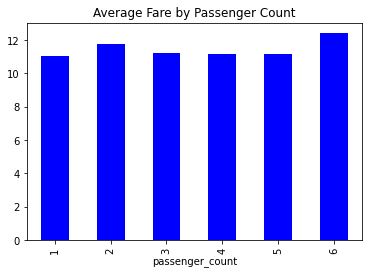

In [ ]:
data_df.groupby('passenger_count')['fare_amount'].mean().plot.bar(color = 'b');
plt.title('Average Fare by Passenger Count');

Lets take a look at the average fare amount for Day of the week, month and year.

There doesn't seem to be a pattern for the avg fare during the day of the week, there is a small dip for Sat and Sun seems to be the highest avg between the days of the week.

The months shows that the avg fare for Jan, Feb, July, and Aug seem to be lower, while the month of May, Sept, Oct, Nov, and Dec are a lot higher.

For the years, The fare's have been steadily going up since the first data point.  This could be due to the rate of inflation over the years and 2012 into 2013 had the biggest hike in fare.

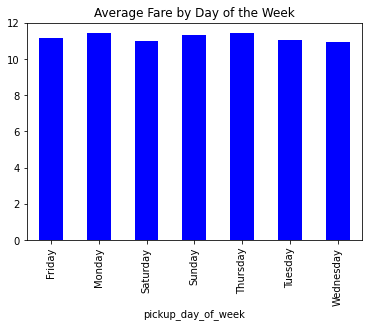

In [ ]:
data_df.groupby('pickup_day_of_week')['fare_amount'].mean().plot.bar(color = 'b');
plt.title('Average Fare by Day of the Week');

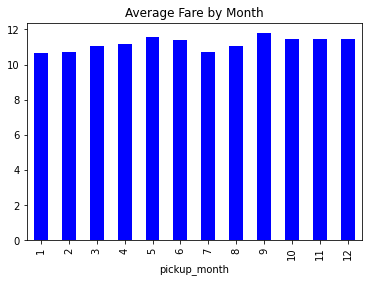

In [ ]:
data_df.groupby('pickup_month')['fare_amount'].mean().plot.bar(color = 'b');
plt.title('Average Fare by Month');

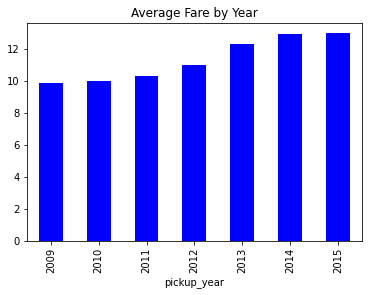

In [ ]:
data_df.groupby('pickup_year')['fare_amount'].mean().plot.bar(color = 'b');
plt.title('Average Fare by Year');


We should try plotting the Manhattan Distance vs Fare Amount and compare it to the Geopy distance vs Fare Amount.  These two charts should be very similar since both charts are a measure of distance vs fare amount.

After looking at the charts, you can see that there are a couple horizontal lines at set fare amounts, there might be set fares for certain destinations that we can look up.


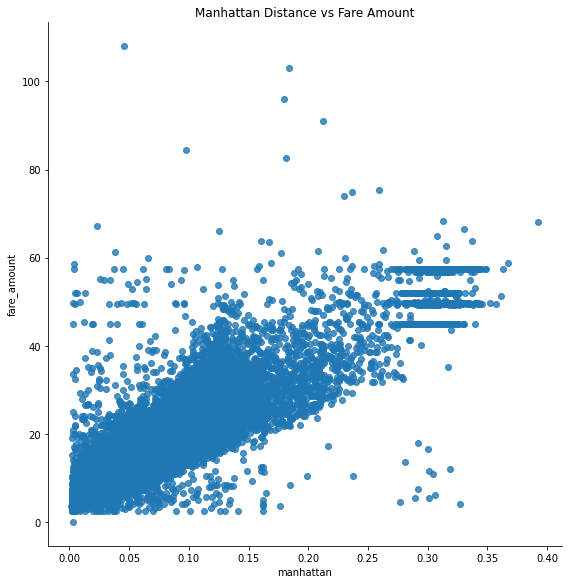

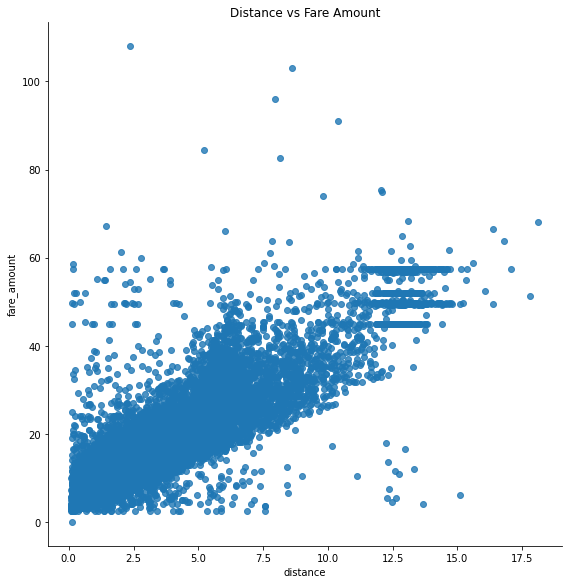

In [ ]:
palette = sns.color_palette('Paired', 10)

sns.lmplot('manhattan', 'fare_amount', height = 8, palette=palette,
           fit_reg = False, data = data_df.sample(len(data_df)));
plt.title('Manhattan Distance vs Fare Amount');

sns.lmplot('distance', 'fare_amount', height = 8, palette=palette,
           fit_reg = False, data = data_df.sample(len(data_df)));
plt.title('Distance vs Fare Amount');

JFK has a set taxi fare, we can temporarily take them out since theres nothing to really learn about a taxi ride that ends in JFK since its going to be a set amount.

In [ ]:
# may not use
nyc_airports={'JFK':{'min_lng':-73.8352, 
                     'min_lat':40.6195,
                     'max_lng':-73.7401, 
                     'max_lat':40.6659},
              
              'LaGuardia':{'min_lng':-73.8895, 
                           'min_lat':40.7664, 
                           'max_lng':-73.8550, 
                           'max_lat':40.7931   
                  }   
              }

def isAirport(latitude,longitude,airport_name='JFK'):
    if latitude>=nyc_airports[airport_name]['min_lat'] and latitude<=nyc_airports[airport_name]['max_lat'] and longitude>=nyc_airports[airport_name]['min_lng'] and \
    longitude<=nyc_airports[airport_name]['max_lng']:
        return 1
    else:
        return 0

In [ ]:
     print('Old size: %d' % len(data_df))
     data_df = data_df[(data_df.dropoff_longitude < -73.8352) & (data_df.pickup_longitude < -73.8352)]
     print('New size: %d' % len(data_df))

Old size: 47707
New size: 46516


In [ ]:
data_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,manhattan,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,0.011742,2009-06-15,15,17,Monday,6,2009,0.639764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,0.107481,2010-01-05,5,16,Tuesday,1,2010,5.246511
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,0.019212,2011-08-18,18,0,Thursday,8,2011,0.863167
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,0.029386,2012-04-21,21,4,Saturday,4,2012,1.737223
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,0.027194,2010-03-09,9,7,Tuesday,3,2010,1.241710


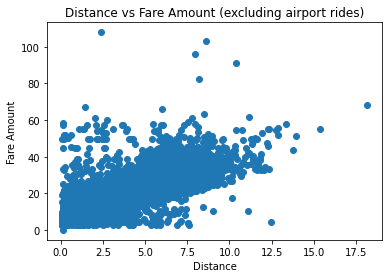

In [ ]:
plt.scatter(data_df['distance'],data_df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("Fare Amount")
plt.title("Distance vs Fare Amount (excluding airport rides)")
plt.show()

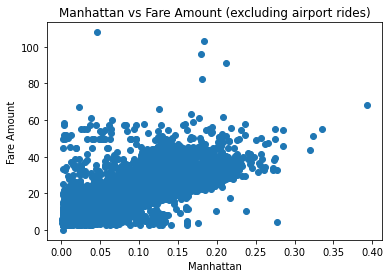

In [ ]:
plt.scatter(data_df['manhattan'],data_df['fare_amount'])
plt.xlabel("Manhattan")
plt.ylabel("Fare Amount")
plt.title("Manhattan vs Fare Amount (excluding airport rides)")
plt.show()

We can create a heatmap to show which feature has the most impact on other features such has fare amount, which is what we're looking for

The heatmap show that the Geopy distance and the manhattan distance clearly weigh more heavily than the other features and that the day, month, and year don't seem to have too much of an impact.

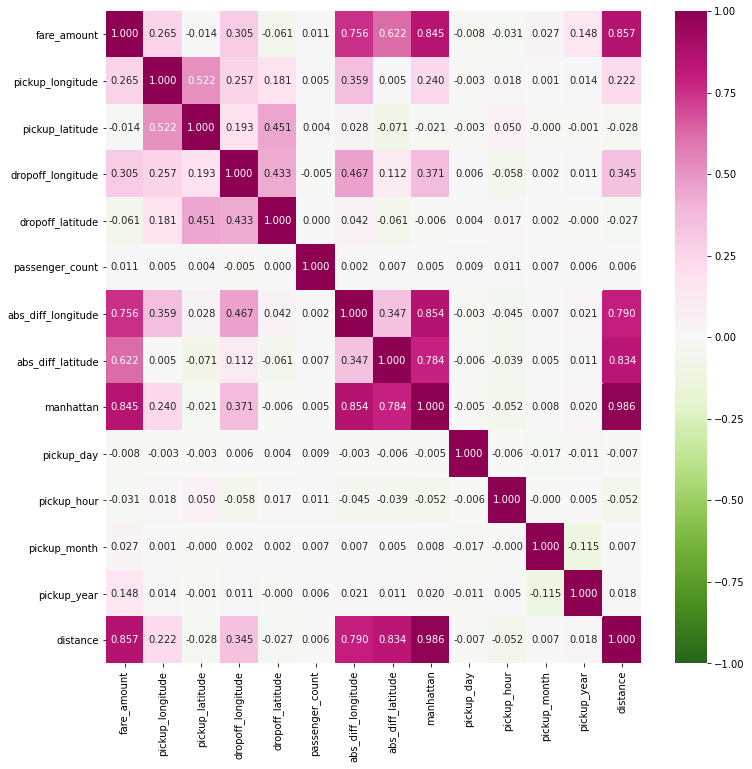

In [ ]:
corrs = data_df.corr()

plt.figure(figsize = (12, 12))
sns.heatmap(corrs, annot = True, vmin = -1, vmax = 1, fmt = '.3f', cmap=plt.cm.PiYG_r);


Here's an easier chart to look at for the correlations for the fare amount.

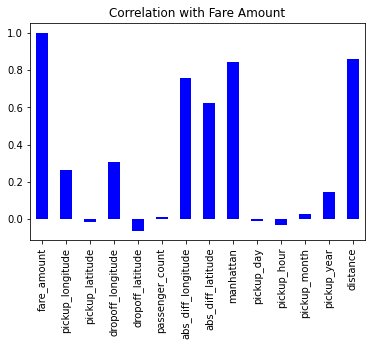

In [ ]:
corrs['fare_amount'].plot.bar(color = 'b');
plt.title('Correlation with Fare Amount');

We can now split our data into training and testing sets of 80% and 20% respectively.

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_df, test_size=0.20)

In [ ]:
train_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,manhattan,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance
6106,4.0,2014-03-02 09:49:56+00:00,-73.964428,40.760462,-73.971607,40.762060,1,0.007179,0.001598,0.008777,2014-03-02,2,9,Sunday,3,2014,0.392471
32251,4.5,2012-11-22 05:14:15+00:00,-73.921839,40.746551,-73.924469,40.742999,1,0.002630,0.003552,0.006182,2012-11-22,22,5,Thursday,11,2012,0.281288
12753,6.0,2014-09-18 11:01:00+00:00,-73.995480,40.744337,-73.993687,40.751905,5,0.001793,0.007568,0.009361,2014-09-18,18,11,Thursday,9,2014,0.530621
8167,5.7,2012-05-14 20:48:03+00:00,-73.984255,40.754965,-73.999895,40.761412,1,0.015640,0.006447,0.022087,2012-05-14,14,20,Monday,5,2012,0.933451
11424,7.0,2015-05-02 20:32:58+00:00,-73.985237,40.732681,-73.973518,40.743622,1,0.011719,0.010941,0.022659,2015-05-02,2,20,Saturday,5,2015,0.973765


Lets drop "fare_amount" from our testing data as that is to be predicted.

In [ ]:
test_data = test_data.drop('fare_amount', axis=1)

In [ ]:
test_data = test_data.dropna(how = 'any', axis = 'rows')

In [ ]:
test_data.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,manhattan,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance
2206,2009-10-07 18:29:18+00:00,-73.972034,40.689613,-73.952303,40.768188,1,0.019731,0.078575,0.098306,2009-10-07,7,18,Wednesday,10,2009,5.519909
46187,2014-09-08 09:27:00+00:00,-73.966897,40.793677,-73.978738,40.756355,1,0.011841,0.037322,0.049163,2014-09-08,8,9,Monday,9,2014,2.649177
14228,2010-10-22 00:40:00+00:00,-73.986223,40.761973,-73.947008,40.777423,1,0.039215,0.015450,0.054665,2010-10-22,22,0,Friday,10,2010,2.317073
4008,2013-05-30 19:35:25+00:00,-73.975217,40.763605,-74.003655,40.718256,1,0.028438,0.045349,0.073787,2013-05-30,30,19,Thursday,5,2013,3.466915
45748,2010-08-27 16:19:00+00:00,-73.969847,40.763890,-73.980452,40.775673,1,0.010605,0.011783,0.022388,2010-08-27,27,16,Friday,8,2010,0.985185


### Train our model and predict the fare
From the information gathered, it seems that the feature having the most impact on thefare_amount is the distance traveled.
Our model will take the form $X \cdot w = y$ where $X$ is a matrix of input features, and $y$ is a column of the target variable, `fare_amount`, for each row. The weight column $w$ is what we will "learn".

First let's setup our input matrix $X$ and target column $y$ from our training set.  The matrix $X$ should consist of the two GPS coordinate differences, the geopy distance, and the manhattan distance, plus a term of 1 to allow the model to learn a constant bias term.  The column $y$ should consist of the target `fare_amount` values.

In [ ]:
# Construct and return an input matrix for our linear model
# using the travel vector, plus a 1.0 for a constant bias term.
def get_input_matrix(df):
    return np.column_stack(( df.distance, df.manhattan, df.abs_diff_longitude, df.abs_diff_latitude, np.ones(len(df))))

train_X = get_input_matrix(train_data) # This is the X matrix

<center>train_X$\space = X =\begin{pmatrix}(x_1) \\(x_2) \\.\\.\\(x_n)\end{pmatrix}$

Where $x_i$ is a matrix of features of the ith row in the train_data Dataframe

In [ ]:
train_y = np.array(train_data['fare_amount'])

<center>train_y$\space = [y_1,\space y_2,\space y_3,\space... y_{n-2},\space y_{n-1},\space y_n]$

Where y_i is the fare amount for the ith row in the train_data Dataframe

Now let's use `numpy`'s `lstsq` library function to find the optimal weight column $w$.

In [ ]:
# The lstsq function returns several things, and we only care about the actual weight vector w.
(w, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond = None)


In [ ]:
# Reuse the above helper functions to add our features and generate the input matrix.
add_travel_vector_features(test_data)
test_X = get_input_matrix(test_data)
# Predict fare_amount on the test set using our model (w) trained on the training set.
test_y_predictions = np.matmul(test_X, w).round(decimals = 2)

# Write the predictions to a CSV file  
submission = pd.DataFrame( {'key': test_data.pickup_datetime, 'fare_amount': test_y_predictions}, columns = ['key', 'fare_amount'])
submission.to_csv('/content/drive/My Drive/data/submission.csv', index = False)

print(os.listdir('/content/drive/My Drive/data/'))

['train.csv', 'test.csv', 'submission.csv']


In [ ]:
test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9304 entries, 2206 to 8575
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   pickup_datetime     9304 non-null   datetime64[ns, UTC]
 1   pickup_longitude    9304 non-null   float64            
 2   pickup_latitude     9304 non-null   float64            
 3   dropoff_longitude   9304 non-null   float64            
 4   dropoff_latitude    9304 non-null   float64            
 5   passenger_count     9304 non-null   int64              
 6   abs_diff_longitude  9304 non-null   float64            
 7   abs_diff_latitude   9304 non-null   float64            
 8   manhattan           9304 non-null   float64            
 9   pickup_date         9304 non-null   object             
 10  pickup_day          9304 non-null   int64              
 11  pickup_hour         9304 non-null   int64              
 12  pickup_day_of_week  9304 non-nu

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,manhattan,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance
2206,2009-10-07 18:29:18+00:00,-73.972034,40.689613,-73.952303,40.768188,1,0.019731,0.078575,0.098306,2009-10-07,7,18,Wednesday,10,2009,5.519909
46187,2014-09-08 09:27:00+00:00,-73.966897,40.793677,-73.978738,40.756355,1,0.011841,0.037322,0.049163,2014-09-08,8,9,Monday,9,2014,2.649177
14228,2010-10-22 00:40:00+00:00,-73.986223,40.761973,-73.947008,40.777423,1,0.039215,0.015450,0.054665,2010-10-22,22,0,Friday,10,2010,2.317073
4008,2013-05-30 19:35:25+00:00,-73.975217,40.763605,-74.003655,40.718256,1,0.028438,0.045349,0.073787,2013-05-30,30,19,Thursday,5,2013,3.466915
45748,2010-08-27 16:19:00+00:00,-73.969847,40.763890,-73.980452,40.775673,1,0.010605,0.011783,0.022388,2010-08-27,27,16,Friday,8,2010,0.985185


Using the sklearn toolkit to do a linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = train_X[:len(test_data)]

model = LinearRegression() 
model.fit(train_X,train_y) # fit the model to the training data
prediction = model.predict(X_train) # make a prediction
target = train_y[:len(prediction)] # train_y = np.array(train_data['fare_amount'])

Looks like the linear model presiction is the same as was calculated by starter.


Plot the "actual vs predicted" on the graph and output the Root Mean Squared Error.

 We can use the Mean Squared Error or Root Mean Squared Error to see how acurate our model is. <center>$$ MSE = { \frac{1}{n}\sum_{i=1}^{n}\Big(y_i - \hat{y_i}\Big)^2}\space\space\space\space\space  RMSE = \sqrt{ \frac{1}{n}\sum_{i=1}^{n}\Big(y_i - \hat{y_i}\Big)^2}$$
 Where n = len(test_data), y = predicted, and $\hat{y_i}$ = the actual

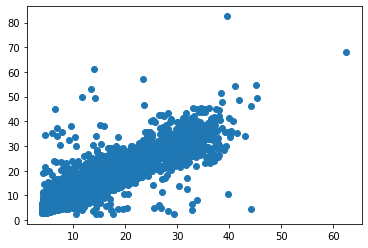

Root Mean Squared Error: 3.2155109064623577


In [ ]:
from sklearn.metrics import mean_squared_error

plt.scatter(prediction,target)
plt.show()

rmse = mean_squared_error(target, prediction, squared=False)

print("Root Mean Squared Error:", rmse)